Observations
1. Cloudiness levels seemed to be dispersed evenly based on the data and there wasn't much of a difference based on latitude.  

2. Humidity is most heavily focused in the 60-100% zone based on the data

3. Wind speeds didn't seem to be affected based on Northern or Southern Hemispheres, the patterns were relatively the same. 

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#print(query_url) #comment to remove api from view

In [8]:
# set up lists to hold reponse info
city_name=[]
lat_list=[]
lng_list=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
count_record=1

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {count_record}: | {city}")  
        count_record +=1
    except(KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1: | georgetown
Processing Record 2: | zhigansk
Processing Record 3: | vila franca do campo
Processing Record 4: | ponta do sol
City not found. Skipping...
Processing Record 5: | hobart
Processing Record 6: | yellowknife
Processing Record 7: | ushuaia
City not found. Skipping...
Processing Record 8: | nikolskoye
Processing Record 9: | cape town
Processing Record 10: | butaritari
Processing Record 11: | mar del plata
Processing Record 12: | maniitsoq
Processing Record 13: | talara
Processing Record 14: | pala
Processing Record 15: | busselton
Processing Record 16: | mataura
Processing Record 17: | port blair
City not found. Skipping...
Processing Record 18: | salalah
Processing Record 19: | ribeira grande
Processing Record 20: | asau
Processing Record 21: | severo-kurilsk
Processing Record 22: | puerto ayora
City not found. Skipping...
Processing Record 23: | leningradskiy
Processing Record 24: | sinnamary
Processi

Processing Record 229: | omsukchan
Processing Record 230: | kyra
Processing Record 231: | komsomolskiy
Processing Record 232: | amapa
Processing Record 233: | goulburn
Processing Record 234: | touros
City not found. Skipping...
Processing Record 235: | los andes
Processing Record 236: | mount gambier
Processing Record 237: | mangai
Processing Record 238: | kukushtan
Processing Record 239: | tautira
City not found. Skipping...
Processing Record 240: | ormara
Processing Record 241: | gizo
Processing Record 242: | codrington
Processing Record 243: | san patricio
Processing Record 244: | lensk
City not found. Skipping...
Processing Record 245: | ucluelet
Processing Record 246: | san carlos de bariloche
Processing Record 247: | cabedelo
Processing Record 248: | methala
Processing Record 249: | were ilu
City not found. Skipping...
Processing Record 250: | issoire
Processing Record 251: | ilulissat
Processing Record 252: | taltal
Processing Record 253: | atambua
Processing Record 254: | maidu

Processing Record 451: | ngunguru
Processing Record 452: | chumikan
Processing Record 453: | moose factory
Processing Record 454: | pitimbu
City not found. Skipping...
City not found. Skipping...
Processing Record 455: | elmadag
Processing Record 456: | bhawana
City not found. Skipping...
Processing Record 457: | kupino
Processing Record 458: | olkhovka
Processing Record 459: | miraflores
Processing Record 460: | ondoy
Processing Record 461: | marienburg
Processing Record 462: | kruisfontein
Processing Record 463: | saint-denis
Processing Record 464: | fuerte olimpo
Processing Record 465: | kathmandu
Processing Record 466: | nioro
Processing Record 467: | verkhoyansk
Processing Record 468: | jambi
Processing Record 469: | port-cartier
Processing Record 470: | joshimath
Processing Record 471: | chapais
Processing Record 472: | esso
Processing Record 473: | aktas
Processing Record 474: | loreto
Processing Record 475: | grand gaube
Processing Record 476: | hambantota
Processing Record 477

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create new Data Frame
city_data = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : cloudiness,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date
})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,George Town,5.4112,100.3354,30.96,84,40,0.45,MY,1628567407
1,Zhigansk,66.7697,123.3711,21.52,41,98,8.76,RU,1628567625
2,Vila Franca do Campo,37.7167,-25.4333,20.23,82,36,1.25,PT,1628567626
3,Ponta do Sol,32.6667,-17.1000,21.51,79,27,1.04,PT,1628567626
4,Hobart,-42.8794,147.3294,19.03,49,75,1.79,AU,1628567486


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.472956,18.739274,20.994142,68.830088,50.261947,3.457115,1.628568e+09
std,33.060427,93.124166,7.392805,21.591866,39.140301,2.681417,1.450737e+02
min,-54.800000,-175.200000,-2.140000,9.000000,0.000000,0.000000,1.628567e+09
25%,-7.300000,-66.382100,15.790000,56.000000,6.000000,1.540000,1.628567e+09
50%,21.850000,23.450000,21.840000,73.000000,51.000000,2.720000,1.628568e+09
75%,47.666600,102.783900,26.540000,86.000000,90.000000,4.700000,1.628568e+09
max,78.218600,179.316700,38.970000,100.000000,100.000000,18.450000,1.628568e+09


In [11]:
#Get the indices of cities that have humidity over 100%.
extra_humid=city_data[city_data["Humidity"]>100].index
extra_humid

Int64Index([], dtype='int64')

In [12]:
#Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Save as csv file
clean_city=pd.DataFrame
clean_city_data=city_data
clean_city_data.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

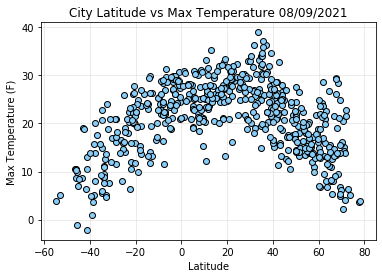

In [26]:
#Scatter plot format and labels
plt.scatter(lat_list, max_temp, color="lightskyblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature 08/09/2021")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Plots/City Lat vs Max Temp.png")
plt.show()

## Latitude vs. Humidity Plot

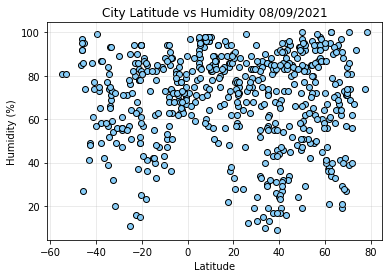

In [14]:
#Scatter plot format and labels
plt.scatter(lat_list, humidity, color="lightskyblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity 08/09/2021")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Plots/City Lat vs Humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

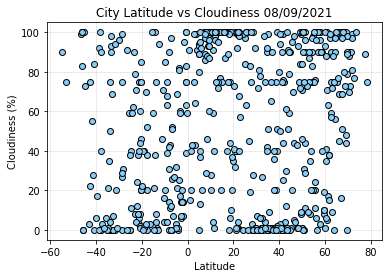

In [15]:
#Scatter plot format and labels
plt.scatter(lat_list, cloudiness, color="lightskyblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness 08/09/2021")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Plots/City Lat vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

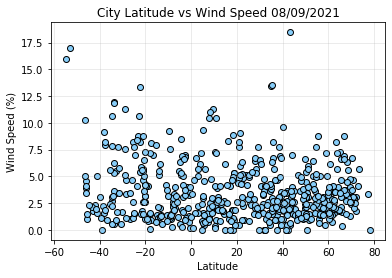

In [16]:
#Scatter plot format and labels
plt.scatter(lat_list, wind_speed, color="lightskyblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.title("City Latitude vs Wind Speed 08/09/2021")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Plots/City Lat vs Wind Speed.png")
plt.show()

## Linear Regression

In [17]:
#Define hemispheres for the linear regression models
north=city_data.loc[city_data["Lat"]>=0]
south=city_data.loc[city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

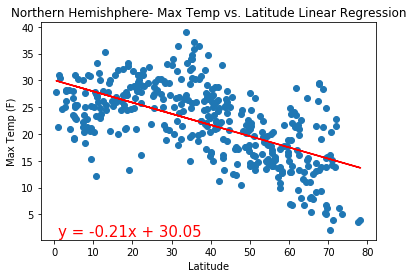

The r-squared is: 0.3583342766067703


In [18]:
#r-squared value and plot
x_values = (north["Lat"])
y_values = (north["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude") 
plt.ylabel("Max Temp (F)") 
plt.title("Northern Hemishphere- Max Temp vs. Latitude Linear Regression")

#Saves to file 
plt.savefig("Plots/Northern Hem-Max Temp vs Lat Linear Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

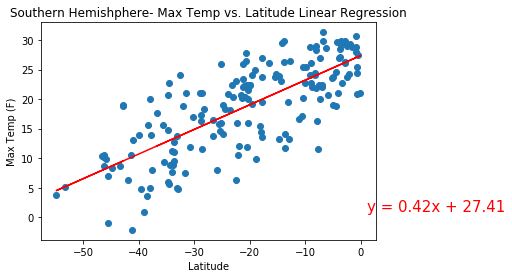

The r-squared is: 0.5738538103422804


In [19]:
#r-squared value and plot
x_values = (south["Lat"])
y_values = (south["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude") 
plt.ylabel("Max Temp (F)") 
plt.title("Southern Hemishphere- Max Temp vs. Latitude Linear Regression")

#Saves to file 
plt.savefig("Plots/Southern Hem-Max Temp vs Lat Linear Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

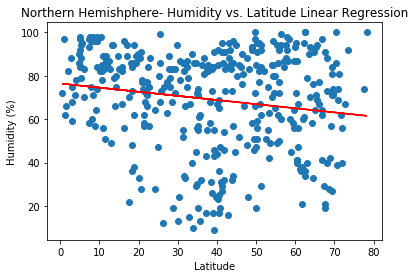

The r-squared is: 0.0283414722445811


In [20]:
#r-squared value and plot
x_values = (north["Lat"])
y_values = (north["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)") 
plt.title("Northern Hemishphere- Humidity vs. Latitude Linear Regression")

#Saves to file 
plt.savefig("Plots/Northern Hem Humidity vs Lat Linear Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

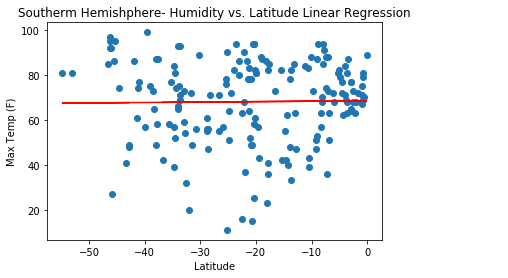

The r-squared is: 0.00019927039923427976


In [21]:
#r-squared value and plot
x_values = (south["Lat"])
y_values = (south["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude") 
plt.ylabel("Max Temp (F)") #
plt.title("Southerm Hemishphere- Humidity vs. Latitude Linear Regression")

#Saves to file 
plt.savefig("Plots/Southern Hem-Max Temp vs Lat Linear Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

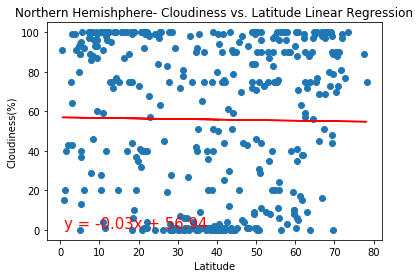

The r-squared is: 0.00019855160071786485


In [22]:
#r-squared value and plot
x_values = (north["Lat"])
y_values = (north["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness(%)") 
plt.title("Northern Hemishphere- Cloudiness vs. Latitude Linear Regression")

#Saves to file 
plt.savefig("Plots/Northern Hem-Cloudiness vs Lat Linear Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

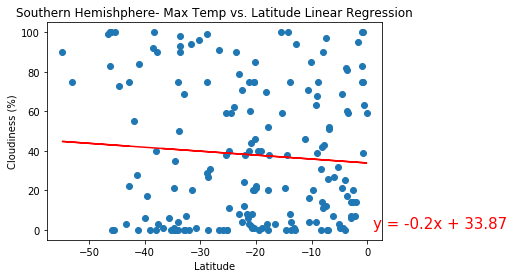

The r-squared is: 0.006039959980308852


In [23]:
#r-squared value and plot
x_values = (south["Lat"])
y_values = (south["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)") 
plt.title("Southern Hemishphere- Max Temp vs. Latitude Linear Regression")

#Saves to file 
plt.savefig("Plots/Southern Hem-Max Temp vs Lat Linear Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

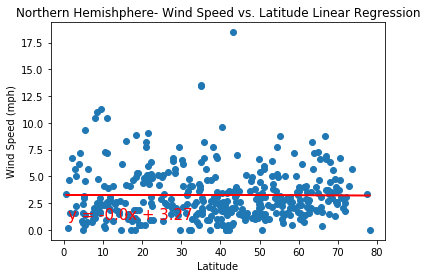

The r-squared is: 5.7920127407429876e-05


In [24]:
#r-squared value and plot
x_values = (north["Lat"])
y_values = (north["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)") 
plt.title("Northern Hemishphere- Wind Speed vs. Latitude Linear Regression")

#Saves to file 
plt.savefig("Plots/Northern Hem-Wind Speed vs Lat Linear Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

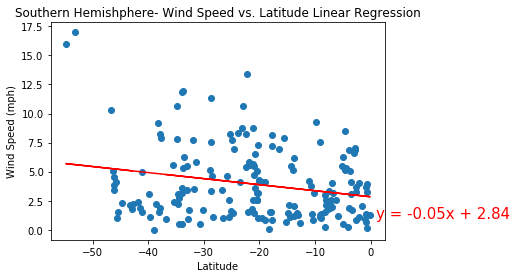

The r-squared is: 0.05260017779786673


In [25]:
#r-squared value and plot
x_values = (south["Lat"])
y_values = (south["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (mph)") 
plt.title("Southern Hemishphere- Wind Speed vs. Latitude Linear Regression")

#Saves to file 
plt.savefig("Plots/Southern Hem-Wind Speed vs Lat Linear Regression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")